# Outliers

Com hem comentat, els outliers són valors anòmals en relació a la mostra completa.

Anem a veure alguns exemples sobre com detectar i tractar aquests.

## Diagrama de caixes o BoxPlots

Els diagrames de caixes o BoxPlots permeten reflexar la distribució de les dades, i per tant, ens aprofiten per detectar dades anòmales.

Veiem-ho al següent exemple.


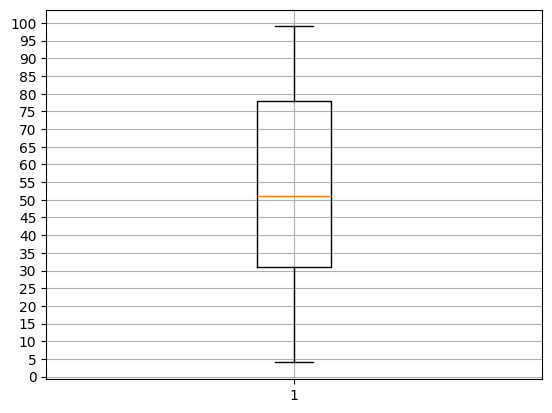

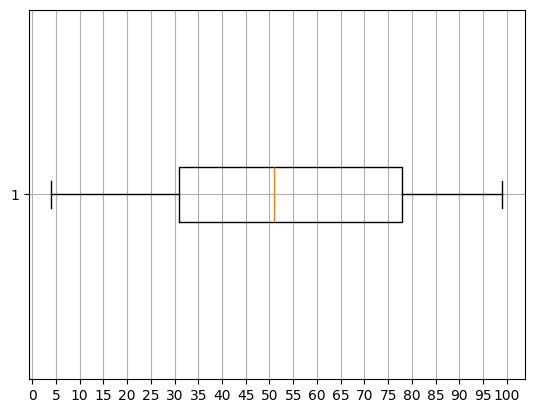

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creem un array ordenat d'edats
edats = np.array([4, 17, 29, 33, 50, 51, 61, 71, 85, 92, 99])

plt.yticks(np.arange(0, 110, 5)) # afegim tics al gràfic per marcar les ades de 5 en 5
plt.grid(True) # Afegim el grid pe vore les graelles
plt.boxplot(edats)  # Dibuixem el BoxPlot i el mostrem
plt.show()

# Si volem vore el gràfic en forma horitzontal
plt.xticks(np.arange(0, 110, 5)) # Afegim els tics per marcar les dades de 5 en 5
plt.grid(True) # Afegim el grid
plt.boxplot(edats, vert=False)
plt.show()


Intentem interpretat aquests gràfics.

Aquest tipus de gràfics ens mostren una caixa entre el primer (Q1) i el tercer quartil (Q3). Recordem que els quartils divideixen la mostra en quatre parts. Aquesta caixa representarà el 50% de les dades centrals, amb una línia a cada extrem que representa els 25% restants. La caixa conté a dins una línia que representa la **mediana** (que seria el valor del segon quartil Q2). També marca el mínim i el màxim, mitjançant línies als extrems, sense outliers.

Amb aquest mètode podem veure com és la distribució de les dades i podem observar els que varien de la majoria prevista.

Tornem a provar amb una nova sèrie de dades:

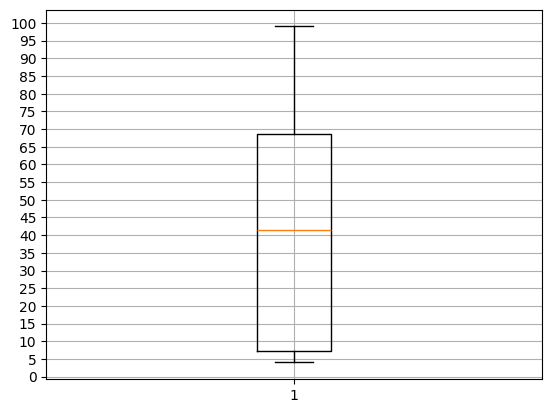

Mínim:  4
Q0:  4
Q1:  7.25
Q2/Mediana:  41.5
Q3:  68.5
Màxim:  99
Q4:  99


In [2]:

# Definim la sèrie
edats = np.array([4,4,4,4, 17, 29, 33, 50, 51, 61, 71, 85, 92, 99])


# Dibuixem el gràfic
plt.yticks(np.arange(0, 110, 5)) # afegim tics al gràfic per marcar les ades de 5 en 5
plt.grid(True) # Afegim el grid pe vore les graelles
plt.boxplot(edats)  # Dibuixem el BoxPlot i el mostrem
plt.show()

# I mostrem informació estadística sobre ells
print ("Mínim: ",np.min(edats))
print ("Q0: ",np.quantile(edats,0))
print ("Q1: ",np.quantile(edats, 0.25))
print ("Q2/Mediana: ",np.median(edats))
print ("Q3: ",np.quantile(edats, 0.75))
print ("Màxim: ",np.max(edats))
print ("Q4: ",np.quantile(edats,1))


Com veiem ara, el primer quartil (Q1) és molt menut (7.25), indicant que hi ha moltes dades amb valors baixets.

Veiem ara un altre array i fem les mateixes operacions.

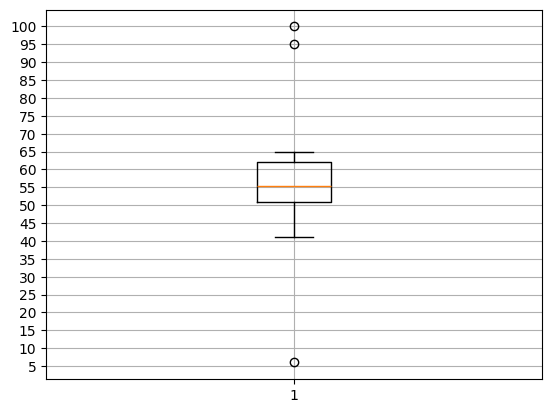

Mínim:  6
Q0:  6
Q1:  51.0
Q2/Mediana:  55.5
Q3:  62.0
Màxim:  100
Q4:  100


In [3]:
edats = np.array([6, 41, 51, 51, 52, 54, 57, 60, 61, 65, 95, 100])

# Dibuixem el gràfic
plt.yticks(np.arange(0, 110, 5)) # afegim tics al gràfic per marcar les ades de 5 en 5
plt.grid(True) # Afegim el grid pe vore les graelles
plt.boxplot(edats)  # Dibuixem el BoxPlot i el mostrem
plt.show()

# I mostrem informació estadística sobre ells
print ("Mínim: ",np.min(edats))
print ("Q0: ",np.quantile(edats,0))
print ("Q1: ",np.quantile(edats, 0.25))
print ("Q2/Mediana: ",np.median(edats))
print ("Q3: ",np.quantile(edats, 0.75))
print ("Màxim: ",np.max(edats))
print ("Q4: ",np.quantile(edats,1))

Ara el diagrama de caixes ens mostra tres punts per fora la caixa i els quartils. **Aquests punts són els outliers d'aquesta mostra**.

Açò es basa en la **regla empírica de la distribució normal**, que assumia que el 68% de les mostres es trobaven en el rang $[\mu - \sigma, \mu + \sigma]$ i el 95% en el rang $[\mu - 2\sigma, \mu + 2\sigma]$.

Els *outliers* són per tant aquells valors qu ees troben a fora d'aquest percentatge.

### Representació de caixes BoxPlot a partir de DataFrames de Pandas

En l'exemple anterior hem vist com representar *BoxPlots* per a vectors de `numpy`. Anem a veure ara com fer-ho amb *DataFrames* de Pandas.

Per a això farem ús de l'orde `DataFrame.boxplot()`. Ho veiem amb un exemple.

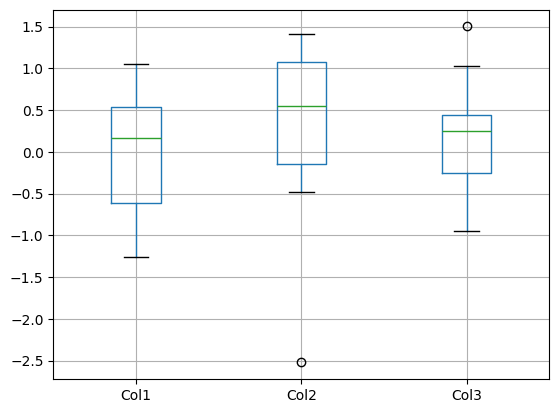

In [4]:
# Declarem llibreries
import numpy as np
import pandas as pd

# Definim una matriu de 10*4 de números aleatoris, amb mitjana 0 i variança 1
dades=np.random.randn(10, 4)

# Creem un dataFrame amb aquest amatriu, establint el nom de les columnes
df = pd.DataFrame(dades, columns=['Col1', 'Col2', 'Col3', 'Col4'])
# Creem el boxpolot directament amb DataFrame.boxplot, passant-li les 
# columne que desitgem.
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])  # Caixes en vertical
# boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'], vert=False)  # Caixes en horitzontal

# Nota: Proveu a llançar vàries vegades l'script, pe veure com varia la representació i l'aparició d'outliers.

### Mètode basat en Quartils. Rang interquartílic.

En aquest mètode calculem el rang interquartílic i considerem outliers totes aquelles mostres que cauen fora del rang $[Q1-k·RIQ, Q3+k·RIQ]$, on k és una banda ajustable, amb valors comuns d'1.5 o 3.

In [5]:
# Definim l'array d'edats
edats = np.array([6, 41, 51, 51, 52, 54, 57, 60, 61, 65, 95, 100])

# Calculem el 1r i 3r quartil per obtenir el RIQ
Q1 = np.quantile(edats,0.25)
Q3 = np.quantile(edats,0.75)
RIQ = Q3 - Q1

# Definim la banda amb 1.5, per detectar otuliers anomenats febles
# Podem canviar aquesta banda, passant d'1.5 a 3 per detectar outliers forts.
k = 1.5
xL = Q1 - k * RIQ 
xU = Q3 + k * RIQ 

# Recorrem i comprovem les dades
for i in  range(len(edats)):
        if edats[i] < xL  or edats[i]>xU:
          print(f" La dada [{i}]={edats[i]} és un outlier")


 La dada [0]=6 és un outlier
 La dada [10]=95 és un outlier
 La dada [11]=100 és un outlier


## Boscos d'aïllament (i-forest)

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

edats = np.array([6, 41, 51, 51, 52, 54, 57, 60, 61, 65, 95, 100])
# Com que IsolationForest requereix d'un array de dues dimensions
# cal redimensionar-lo amb reshape:
edats=edats.reshape(-1,1)

# Definim el model, amb un nivell de contaminació de l'1%
model = IsolationForest(contamination=0.01)

# Ajustem el model amb les edats
model.fit(edats)

# I predim els resultats amb el mètode predict (encara que siguen les dades d'entrenament)
# El vector de resultats condindrà el valor -1 si es tracta d'una dada anòmala i 1 en cas contrari
resultats = model.predict(edats) 
print("Predicció de resultats")
print(resultats, len(resultats))
# Recorrem les diferents 
quantitat_outliers=0
for j in range(len(resultats)):
    if (resultats[j]==-1):
      print("La posició J=",j,"és un outlier(", resultats[j], ") amb valor Valor", edats[j][0])
      quantitat_outliers=quantitat_outliers+1
print("Quantitat d'outliers:", quantitat_outliers)

# També podem mostrar la funció de decisió, que ens mostra la puntuació d'anomalía. Com més baixa, més anormal.
# Puntuacions negatives tendeixen a representar valors atípics i les positives valors típics.
print("\nFunció de decisió: Valors negatius -> Outliers")
print(model.decision_function(edats))

# Paràmetres pr a l'estimador
print("\nParàmetres per a l'estimador")
print(model.get_params())

# Puntuació de les mostres: Probabilitat que una mostra siga anòmala,
# pot fins i tot ser negativa. Com més s'acoste a zero o més baixa siga
# indica una major probabilitat.
print("\nPuntuació de les mostres")
print(model.score_samples(edats))

Predicció de resultats
[-1  1  1  1  1  1  1  1  1  1  1  1] 12
La posició J= 0 és un outlier( -1 ) amb valor Valor 6
Quantitat d'outliers: 1

Funció de decisió: Valors negatius -> Outliers
[-0.0156803   0.17465183  0.35259004  0.35259004  0.35238889  0.34921769
  0.33974883  0.33459494  0.32166169  0.23901407  0.14707704  0.12686792]

Paràmetres per a l'estimador
{'bootstrap': False, 'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}

Puntuació de les mostres
[-0.75109473 -0.5607626  -0.38282439 -0.38282439 -0.38302554 -0.38619674
 -0.3956656  -0.40081949 -0.41375274 -0.49640036 -0.58833739 -0.60854651]


Com podem veure, apareix un outlier en la primera posició, amb valor 6.

Si ens fixem, la funció de decisió, només mostra un valor negatiu en el primer element. Per altra banda, si veiem la puntuació de les mostres, tot i presentar valors més propers, el primer és el qui té una puntuació més baixa (seguit de prop de l'últim). Com que hem establert una contaminació del 10%, estem dient que només considerarem anòmala una de cada 10 mostres, per tant, i com que tenim 10 mostres, s'agafa la més baixa.

# Detecció de dades influents

Anem a analitzar els ingressos d'una població o veïnat. Suposem que tots tenen uns ingressos semblants.

In [35]:
import numpy as np      # Dades estadístiques
import pandas as pd     # Estadística descriptiva

# Generació de dades

# Anem a generar ingresos distribuïts de forma uiforme entre 15000 i 25000€ annuals
ingresos=15000+np.random.rand(100)*10000 # rand(100) genera un vector de 100 elements

Calculem la mitja i la mitjana d'aquesta població:

In [37]:
mitjana = np.mean(ingresos)
mediana = np.median(ingresos)
print(f"Mitjana={mitjana}, mediana={mediana}")

Mitjana=19987.547420829862, mediana=19869.043279373545


Ara suposem que un dels veïns té un ingressos extremadament elevats. Per exemple, el veí 50, amb 500.000€:

In [38]:
ingresos[50]=500000

Ara tornem a calcular la mitjana i la mediana de tota la mostra:

In [39]:
mitjana = np.mean(ingresos)
mediana = np.median(ingresos)
print(f"Mitjana={mitjana}, mediana={mediana}")

Mitjana=24837.362853336217, mediana=19946.03922930485


Com veiem, la mitjana s'ha vist incrementada en vore 5.000€, mentre que la mediana no s'ha vist quasi afectada.

In [41]:
# Creem un vector a zeros

phi=np.zeros(len(ingresos))

# Recorrem el vector de dades element a element, i calculem la mitjana sense l'element en qüestió. 

for i in range(len(ingresos)):
    ingresos_aux=ingresos # Generem una còpia del vector original
    ingresos_sense_i=np.delete(ingresos_aux, i) # Eliminem de la còpia la posició i
    phi[i]=np.mean(ingresos_sense_i) # Calculem la mitja de les dades, sense la posició i, i la guardem en eixa posició del vector phi

# I ja mostrem phi

phi   

array([24870.69071513, 24902.24675467, 24936.3090275 , 24844.13101814,
       24884.17818327, 24870.25552493, 24880.77650092, 24900.04855032,
       24858.28807755, 24869.95590922, 24861.96954948, 24840.15712851,
       24913.87728999, 24903.77431299, 24934.01479551, 24861.67215987,
       24905.60134938, 24848.01282073, 24900.04050716, 24870.08610123,
       24890.09716406, 24928.90268723, 24932.55094036, 24922.89068195,
       24891.46404866, 24901.94576875, 24865.0119628 , 24896.62562493,
       24919.97128634, 24858.71078575, 24908.92188664, 24902.98945111,
       24928.55441726, 24870.64876619, 24864.64017713, 24928.26419613,
       24904.23151107, 24866.09700439, 24897.08509393, 24920.05509282,
       24886.39442806, 24838.63011959, 24926.81058473, 24867.61634777,
       24899.10658199, 24873.79889356, 24888.76142356, 24909.01533046,
       24920.8046654 , 24859.07421915, 20037.7402559 , 24846.69923822,
       24892.94743995, 24881.65208221, 24837.38300874, 24902.89759938,
      

In [43]:
# Ara podem detectar els outliers fent ús dels quantils

Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1      # Raig interquartílic
xL=Q1 - 1.5 * IQR  # Agafem outliers dèbils
xU=Q3 + 1.5 * IQR
for i in  range(len(ingresos)):
     if phi[i] < xL  or phi[i]>xU:
          print(f"La dada {i} és una observació influent per a la mitja.")
        

La dada 50 és una observació influent per a la mitja.
